### import os for  operating system operations e.g., creating a folder

In [45]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [46]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [47]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [48]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [49]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [50]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [51]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [52]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [53]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [54]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [55]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [56]:

df = dataset[:]

### remove the date column

In [57]:

del df['DATE']

In [58]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [59]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [60]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [61]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [62]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [63]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

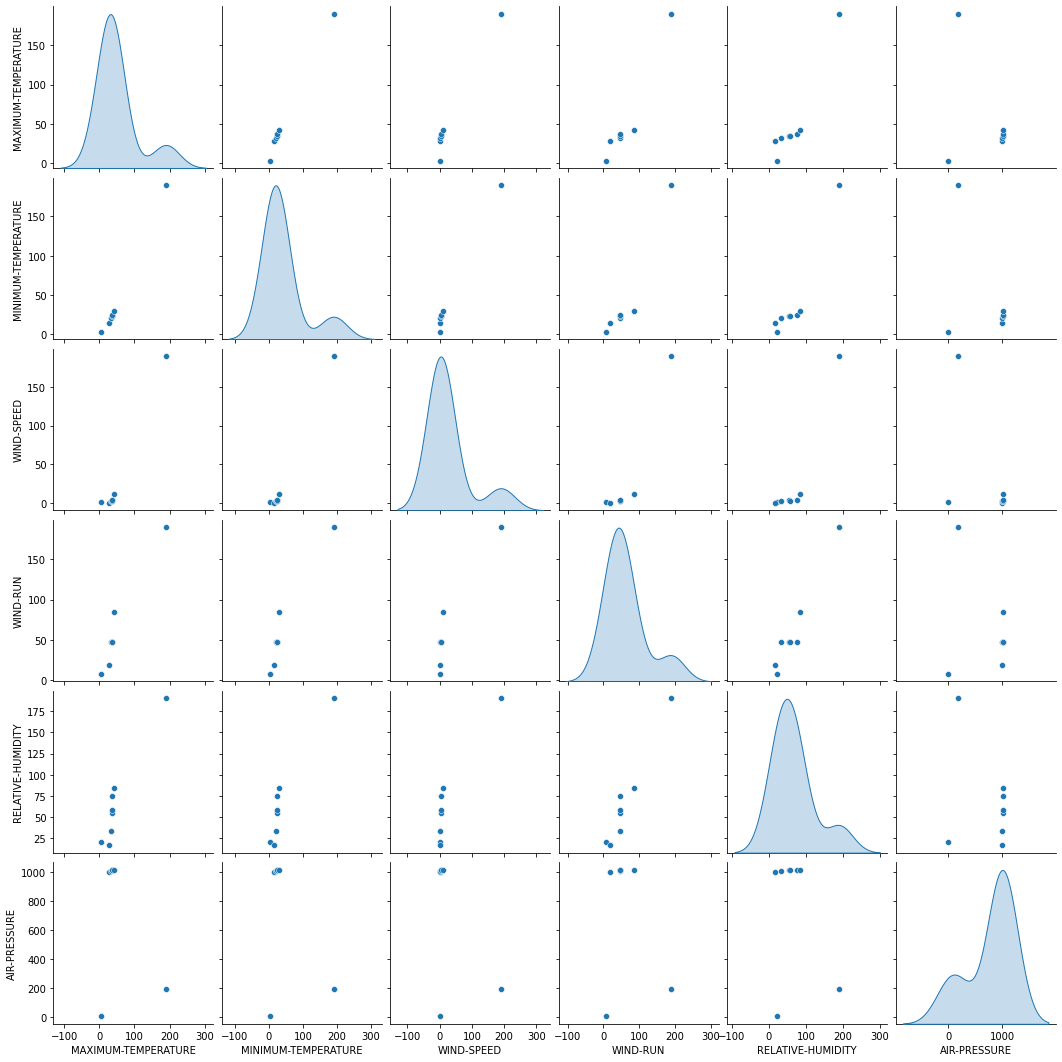

In [64]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [65]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     168.931579
std       56.536831
min       58.000000
25%      119.250000
50%      173.000000
75%      210.750000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [66]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

### define a function to normalize the data set.

In [67]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [68]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [69]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
156,0.455224,0.348387,0.416667,0.439510,0.117647,0.852564
162,0.261194,0.677419,0.250000,0.439510,0.647059,0.826923
253,0.634328,0.445161,0.116667,0.480858,0.132353,0.173077
117,0.335821,0.638710,0.250000,0.439510,0.808824,0.673077
35,0.500000,0.193548,0.250000,0.439510,0.264706,0.782051
280,0.529851,0.761290,0.266667,0.603369,0.720588,0.224359
128,0.208955,0.625806,0.166667,0.439510,0.941176,0.788462
232,0.529851,0.793548,0.333333,0.439510,0.573529,0.653846
92,0.208955,0.632258,0.250000,0.439510,0.941176,0.730769
33,0.410448,0.651613,0.166667,0.439510,0.323529,0.673077


## Build a Neural Network Model

### We declared a function for creating a model.

## import NN and other components.

In [70]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [71]:
def model_multilayer_perceptron_with_nine_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
      model.add(Dropout(0.5))
      model.add(Dense(72, Activation('relu'))) # Hidden layer 3
      model.add(Dropout(0.5))
      model.add(Dense(80, Activation('relu'))) # Hidden layer 4
      model.add(Dropout(0.5))
      model.add(Dense(32, Activation('relu'))) # Hidden layer 5
      model.add(Dense(64, Activation('relu'))) # Hidden layer 6
      model.add(Dense(72, Activation('relu'))) # Hidden layer 7
      model.add(Dense(80, Activation('relu'))) # Hidden layer 8
      model.add(Dense(81, Activation('relu'))) # Hidden layer 9
     
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [72]:
model = model_multilayer_perceptron_with_nine_hidden_layer()
print('Here is a summary of this model: ')


model.summary()


Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_10 (Dropout)

## Training the model we built above.

In [73]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [74]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction_9_layers_n_dropout.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [75]:
%%time

EPOCHS = 1000
batch_size = 6

model = model_multilayer_perceptron_with_nine_hidden_layer()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/CPU:0'):
    history = model.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_14 (Dropout)

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


...........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


............................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.....................
Epoch: 100, loss:5978.6621,  mae:62.7784,  mape:27.8730,  mse:5978.6621,  val_loss:3710.1792,  val_mae:50.1010,  val_mape:27.5476,  val_mse:3710.1792,  
....................................................................................................
Epoch: 200, loss:6663.6968,  mae:72.1870,  mape:47.7613,  mse:6663.6968,  val_loss:6993.1260,  val_mae:73.0170,  val_mape:40.1204,  val_mse:6993.1260,  
....................................................................................................
Epoch: 300, loss:3960.8523,  mae:57.5628,  mape:33.8406,  mse:3960.8523,  val_loss:4435.5952,  val_mae:55.3448,  val_mape:29.7877,  val_mse:4435.5952,  
........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


...........................................................................
Epoch: 400, loss:3514.1853,  mae:39.4100,  mape:25.2288,  mse:3514.1853,  val_loss:5111.5405,  val_mae:60.1410,  val_mape:32.3227,  val_mse:5111.5405,  
....................................................................................................
Epoch: 500, loss:3507.2839,  mae:50.7733,  mape:49.5745,  mse:3507.2839,  val_loss:3206.6509,  val_mae:46.0617,  val_mape:25.0051,  val_mse:3206.6509,  
....................................................................................................
Epoch: 600, loss:2812.9082,  mae:43.3854,  mape:42.3974,  mse:2812.9082,  val_loss:3405.8618,  val_mae:47.1350,  val_mape:25.3655,  val_mse:3405.8618,  
............................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction_9_layers_n_dropout.ckpt\assets


........................................................
Epoch: 700, loss:3460.6436,  mae:55.2127,  mape:37.3233,  mse:3460.6436,  val_loss:4491.4761,  val_mae:55.1623,  val_mape:29.4194,  val_mse:4491.4761,  
....................................................................................................
Epoch: 800, loss:5925.7129,  mae:67.5713,  mape:42.1853,  mse:5925.7129,  val_loss:3612.7749,  val_mae:48.6667,  val_mape:26.1564,  val_mse:3612.7749,  
....................................................................................................
Epoch: 900, loss:1718.8242,  mae:32.9303,  mape:19.0716,  mse:1718.8242,  val_loss:2388.8037,  val_mae:39.1974,  val_mape:22.3000,  val_mse:2388.8037,  
....................................................................................................Wall time: 2min 20s


In [76]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,6949.992188,48.519527,6949.992188,52.722519,4895.436523,57.940887,4895.436523,30.859051,995
996,1607.015991,32.428509,1607.015991,38.966476,5604.437500,63.008335,5604.437500,33.689362,996
997,2008.800293,41.540897,2008.800293,33.939766,4895.488281,57.940025,4895.488281,30.859346,997
998,5193.832520,64.059578,5193.832520,29.041639,2711.148926,41.273022,2711.148926,22.756866,998
999,2346.749756,42.057072,2346.749756,23.707191,1873.597900,35.272621,1873.597900,21.164234,999


In [77]:
# Test the model after training
example_result_test= model.predict(normed_test_data)

In [78]:

example_result_train= model.predict(normed_train_data)

## Compare the predicted values with the actual values

In [79]:
print('Predicted Values')
print(example_result_test[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[158.54834 ]
 [129.14003 ]
 [153.39091 ]
 [145.11049 ]
 [147.81758 ]
 [109.98616 ]
 [160.47252 ]
 [110.57557 ]
 [110.317924]
 [139.75258 ]]

Actual Values
167
177
181
188
170
161
187
 71
160
145


In [80]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,6949.992188,48.519527,6949.992188,52.722519,4895.436523,57.940887,4895.436523,30.859051,995
996,1607.015991,32.428509,1607.015991,38.966476,5604.437500,63.008335,5604.437500,33.689362,996
997,2008.800293,41.540897,2008.800293,33.939766,4895.488281,57.940025,4895.488281,30.859346,997
998,5193.832520,64.059578,5193.832520,29.041639,2711.148926,41.273022,2711.148926,22.756866,998
999,2346.749756,42.057072,2346.749756,23.707191,1873.597900,35.272621,1873.597900,21.164234,999


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

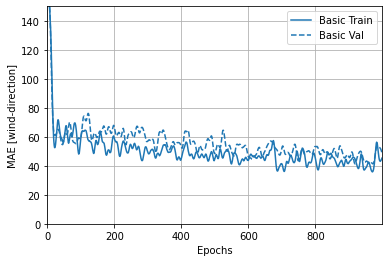

In [81]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

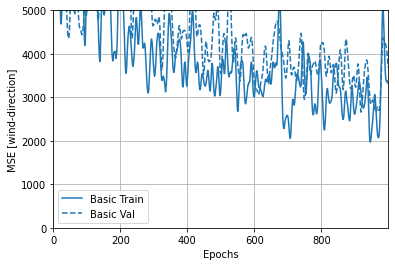

In [82]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [83]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 3050.7004 - mae: 44.8176 - mse: 3050.7004 - mape: 26.5348
Train set Mean Abs Error : 44.82
Train set Mean Square Error : 3050.70


In [84]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1873.5980 - mae: 35.2726 - mse: 1873.5980 - mape: 21.1642
Validation set Mean Abs Error : 35.27
Validation set Mean Square Error : 1873.60


In [85]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 2306.3672 - mae: 36.8569 - mse: 2306.3672 - mape: 23.8254
Testing set Mean Abs Error : 36.86
Testing set Mean Square Error : 2306.37


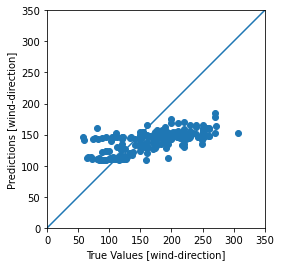

In [86]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

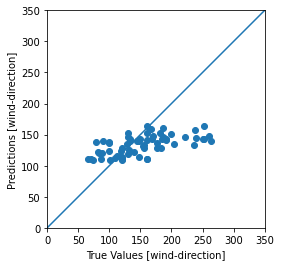

In [87]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

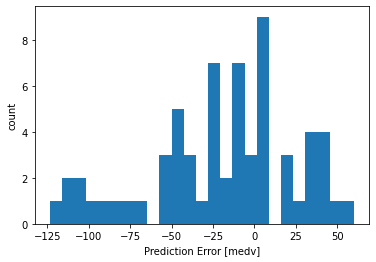

In [88]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")